# Approximating ODEs using Euler's method

In this notebook, we approximate the solution to a parameterized ordinary differential equation using Euler's method.


## Introduction

The ODE we are analyzing is:

$$ \frac{dx}{dt} = rx (1 - \frac{x}{K})$$

This differential equation models the growth of a population. It was first proposed by the French mathematician Pierre Francois Verhulst in 1838 and is known as the 'logistic model' today.

The variable $x$ describes the size of the population, that is, the number of individuals that are alive. The parameter $K$ is the maximal size of the population, for example the maximum number of individuals that the environment can support, while parameter $r$ is the growth rate that describes how quickly the population can grow (i.e. how many children an individual has on average). 

What we want to obtain is a function $x(t)$ that tells us how many individuals of the population are alive at time $t$, given the initial size of the population $x(0).$ This can be done analytically, but solving ODEs analytically can be very hard sometimes.


## Euler's method

Euler's method, named after the great mathematician Leonhard Euler, is a neat trick to approximate the solution to ODEs, which means: Figuring out what the ODE looks like without having to solve it analytically. We will see how it works below. 


## Imports

First, we need to import a few packages, use the inline plotting magic and choose some font settings.

In [10]:
### imports ###

import time
import imageio
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display

%matplotlib inline 

###  matplotlib font settings ###

plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=17) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend

## The Differential Equation

Next, we write a function <i>diff</i> that evaluates the differential equation at a given value $x$. That way, we can ask <i>"How quickly is the population growing if it currently has the size of x individuals?"</i> (That's just what the formula above gives us.)

The task will be to approximate the correct solution using Euler's method, but for plotting and verifying that everything works correctly, it's nice to have the correct analytical solution, so we also wrote a function <i>solution</i> that returns the correct $x(t)$ for a given set of parameters, and the function <i>analytic_solution</i> that returns the population sizes for the two sets of parameters. 

(Normally, if you were using Euler's method, you wouldn't know the correct solution, because if you knew the correct solution, there would be no need to approximate it. We got this solution from [1]).

In [11]:
### differential equation ###

def diff(x, r, K):
    '''
    The differential equation we want to approximate.
    
    x = the value at which we evaluate the equation
    r = the growth rate
    K = the maximum population size
    
    returns the new slope of the curve
    '''
    return r * x * (1 - x / K)


def solution(t, r, K, x0):
    '''
    The analytic solution to the differential equation.
    
    t = the point in time
    r = the growth rate
    K = the maximum population size
    x0 = the initial size of the population (at t=0)
    
    returns the size of the population characterized by r, K, x0 at time t
    '''
    
    return (x0 * K) / (x0 + (K - x0) * np.exp(-1*r*t))


def analytic_solution(t_max):
    '''
    Calculates the values of the actual diff_eq over a range of time steps.
    
    t_max = the maximum value for t
    
    returns the time steps, values for r=K=1, values for r=0.5 and K=2
    '''
    stepsize = 0.1
    tvals = np.arange(0, t_max, stepsize)
    k1_vals = [solution(t, 1, 1, 0.2) for t in tvals]
    k2_vals = [solution(t, 0.5, 2, 0.2) for t in tvals]
    return tvals, k1_vals, k2_vals

## Euler's method

Assuming you are given an ordinary differential equation and an initial value, how can you figure out what the correct solution looks like? For example, look at this plot of some (made-up) differential equation:

<img title="logistic model" src="original_new.png"/>

This picture of $x(t)$ is what we want, but we only know what it looks like because we cheated and asked Wolfram Alpha to calculate the analytic solution. All we really have is the starting point, and the derivative of the function $x(t)$ at every point. The derivative describes the slope of the function's tangent, as illustrated by this animation:
(Run the next cell to play the video)

In [12]:
from IPython.display import HTML

HTML("""
    <video alt="manimation" width="900" controls>
        <source src="TangentOnTour.mp4" type="video/mp4">
    </video>
""")

Euler looked at this and realized that he could use this information to approximate $x(t)$: You start at the initial point $(t_{0}, x_{0})$and just plot it. Then, you use the derivative to calculate the tangent of $x_{0}$. You then walk along the tangent, but only take a very small step, thereby arriving at a new point $(t_{1}, x_{1})$ that almost lies on the original curve. Now, we just pretend that this point relly lies on the original curve and calculate the tangent at $x_{1}$ again, to take another step and arrive at $(t_{2}, x_{2})$.

In [13]:
from IPython.display import HTML

HTML("""
    <video alt="manimation" width="900" controls>
        <source src="manimation.mp4" type="video/mp4">
    </video>
""")

## Euler's method, formally

This formula describes what we explained in the last cell:

$$ x_{n+1} = x_{n} + h * f(t_{n}, x_{n}) $$

To paraphrase: The next value of $x(t+h)$ is the last value of $x(t)$ plus h steps in the direction of the tangent.
This is implemented in the next code cell, where we use the function of the derivative we defined above.

In [14]:
### core Euler approximation ###

def euler_app(x, h, diff_eq, **kwargs):
    '''
    The basic Euler approximation scheme.
    
    x = old value of x
    h = step size
    diff_eq = differential equation
    kwargs = keyword args (=parameters) for the diff-eq
    
    returns the next value in the approximation-series
    '''
    assert h > 0, "h has to be positive!"
    return x + h * diff_eq(x, **kwargs)

## Visualization of Euler's method

Now, we just need to bring everything together to visualize how the Euler method can approximate a differential equation. In the next cell, we plot the <font color="green">analytical solutions</font> to our differential equations in green (we use Verhulst's equation with two sets of parameters, r=K=1 for the first model and r=0.5, K=2 for the second one) and visualize the <font color="red">Euler approximation</font> in red, with a step size of <font color="blue">$h=0.5$</font> for a maximum of <font color="blue">$t\_max=20$</font> steps and a starting point <font color="blue">$x_{0}=0.2$</font>. 

You can play around with the parameters to see their effects. Here are some examples for what you could try to do:

1. Model a population that has a maximum of 1.5 individuals and a growth rate of 0.1
2. Observe what happens if you use a step size of 2
3. Observe what happens if you set the step size to something small, like 0.1

In [15]:
### Euler approximation ###

def euler():
    
    t_max = 20
    h = 0.5 # step size
    
    # starting points
    x1 = 0.2
    x2 = 0.2
    
    # parameters
    r1 = 1
    K1 = 1
    r2 = 0.5
    K2 = 2

    # lists in which values of euler approximations are stored
    x1_vals = [x1]
    x2_vals = [x2]
    
    steps = [0] # list of time steps for plotting
    
    xvals, k1_vals, k2_vals = analytic_solution(t_max)
    
    
    i = 0
    plt.figure(figsize=(20,10))
    while steps[-1] < t_max:
        
        plt.title("Euler approximations")
        plt.xlim(0,21)
        plt.ylim(0,2.1)
        plt.xlabel("timestep")
        plt.ylabel("value of equation")
        
        # plot analytic solutions
        plt.plot(xvals, k1_vals, c='green')
        plt.plot(xvals, k2_vals, c='green')
        
        # calculate euler approx
        x1 = euler_app(x1, h, diff, r=r1, K=K1)
        x2 = euler_app(x2, h, diff, r=r2, K=K2)
        x1_vals.append(x1)
        x2_vals.append(x2)
        steps.append(steps[-1] + h)

        # plot euler solutions
        plt.plot(steps, x1_vals, c='red')
        plt.plot(steps, x2_vals, c='red')
        
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.05)

        i += 1


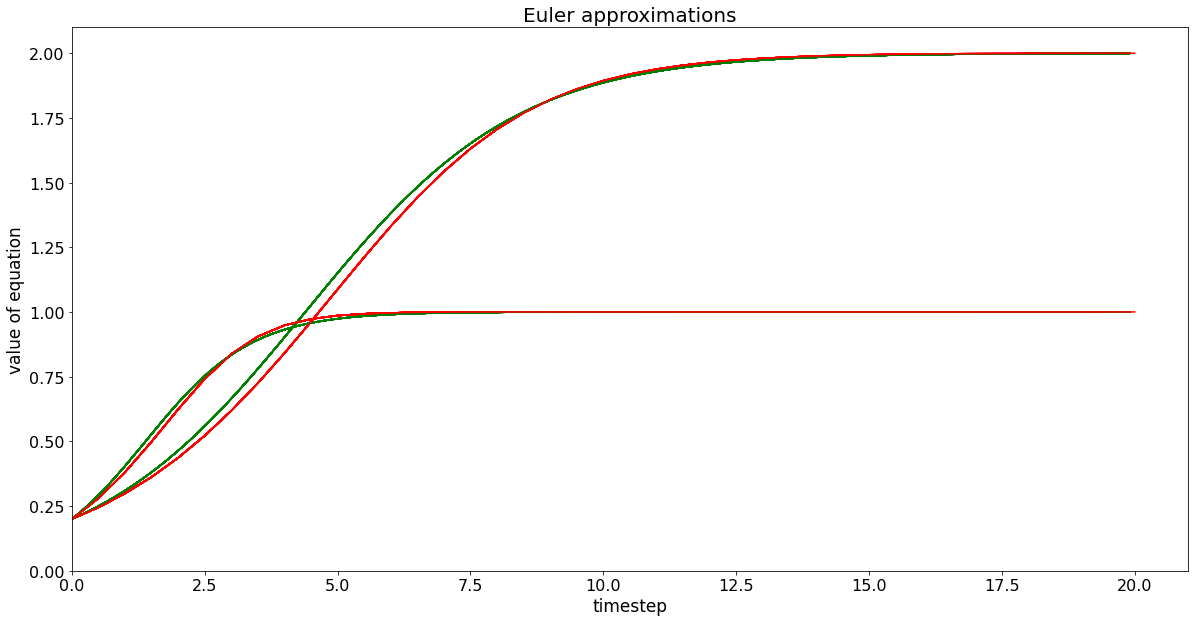

In [16]:
euler() # calling the visualization

## The stepsize parameter

Finally, let's take a look at the only parameter of Euler's method: The stepsize, $h$. (Don't confuse this with $r$ and $K$: These are parameters, too, but only for the specific parameterized ODE that we are analysing here. $r$ and $K$ have nothing to do with the Euler method itself.)

As you might have guessed by now, a bigger stepsize means that we move farther along the tangent, which means that we potentially introduce a bigger error. A smaller stepsize means that we take smaller steps and make smaller errors, but it also means that we need to take way more steps to get to $t\_max$. 

In the next cell, we approximate Verhulst's population model with $r=0.5$ and $K=2$ six times, with a smaller and smaller stepsize. As you can see, the error we get for the larger values is much bigger, but as $h$ gets smaller and smaller, our approximation becomes more accurate, but it also takes longer to complete each approximation.

In [8]:
### Visualizing impact of h ###

def euler_h():
            
    t_max = 20
    hs = [5.0, 4.0, 3.0, 2.0, 1.0, 0.5] # step sizes
    
    # starting point
    x0 = 0.2
    x = x0
    
    # parameters
    r2 = 0.5
    K2 = 2

    # list in which values of euler approximation are stored
    x_vals = [x0]
    
    steps = [0] # list of time steps for plotting
            
    analytic_xvals, _, k2_vals = analytic_solution(t_max)
    
    old = []
    
    for h in hs:
        
        while steps[-1] < t_max:

            plt.figure(figsize=(20,10))
            plt.title("Effect of step size")
            plt.xlim(0,21)
            plt.ylim(0,2.5)
            plt.xlabel("timestep")
            plt.ylabel("value of equation")
            
            plt.text(0.5, 2, "H="+str(h), fontsize=20, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            # plot old runs in the background
            for xs, ys in old:
                plt.plot(xs, ys, c=(1,0,0,0.4), linewidth=0.8)
        
            # plot analytic solution
            plt.plot(analytic_xvals, k2_vals, c='green', linewidth=3)
            
            # calculate euler approx
            x = euler_app(x, h, diff, r=r2, K=K2)
            x_vals.append(x)
            steps.append(steps[-1] + h)

            # plot euler solutions
            plt.plot(steps, x_vals, c='red', linewidth=3)
            
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(0.08)
            
            plt.close()

        old.append((steps, x_vals)) # remember old runs to show them in the background
        
        x = x0
        steps = [0]
        x_vals = [x0]
        

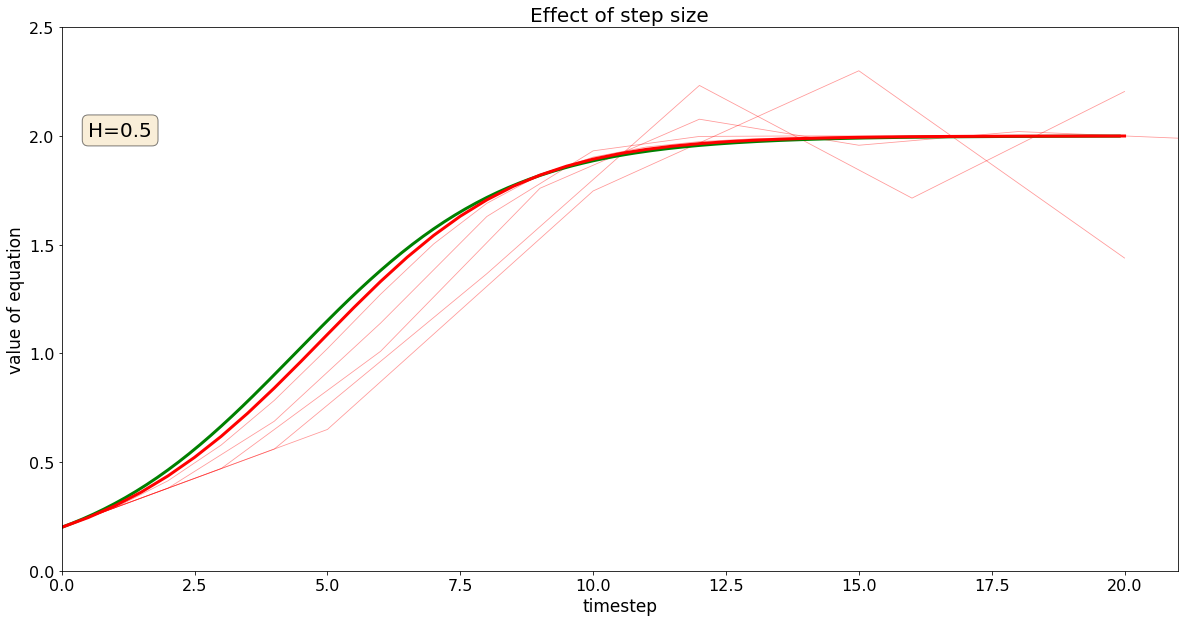

In [9]:
euler_h()

## Drawbacks

The Euler method is simple to explain and easy to understand, but as you might have guessed already, it can take a very small stepsize and a large number of steps to calculate a good approximation. The global error of the approximation is proportional to $h$, while the global error of the better midpoint-method is proportional to the square of $h$. This is what is meant by saying that the Euler method is a first-order approximation method, while the midpoint method is a second-order approximation method.  $[2]$

Another issue is that the Euler method can be numerically unstable, which essentially means that it does not work correctly if you use a stepsize that is too large. There are also certain problems with rounding that you could run into when using it on a computer.  $[2]$

## Final Weird Observation

While putting together this notebook, we ran into one weird observation that we did not understand for a while: Look at the visualization of approximating the population growth with a large stepsize of 5.0. As you can see, the approximation overshoots around t=15 and then corrects by going back up again. How is it possible for the approximation to come back down, if the derivative of the function $x(t)$ is positive everywhere?

The answer took us a while, but is ultimately simple: We calculate the derivative of $x(t)$ at $x=x_{n}$, and when we overshoot, we calculate the derivative at a value which the function never even takes with this initial value, in this case a value above the green line. To get to the fixed point from there, the function of course has to point back down. This should be a problem for functions with multiple fixed points, as we might overshoot into the domain of another fixed point and stay there. 

# References

$[1]$: https://www.math24.net/population-growth

$[2]$: https://en.wikipedia.org/wiki/Euler_method
